In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graphqec import UnrotatedSurfaceCode, ThresholdLAB

In [2]:
rsc = UnrotatedSurfaceCode(
    distance = 3,
    depolarize1_rate = 0.01,
    depolarize2_rate = 0.01
)

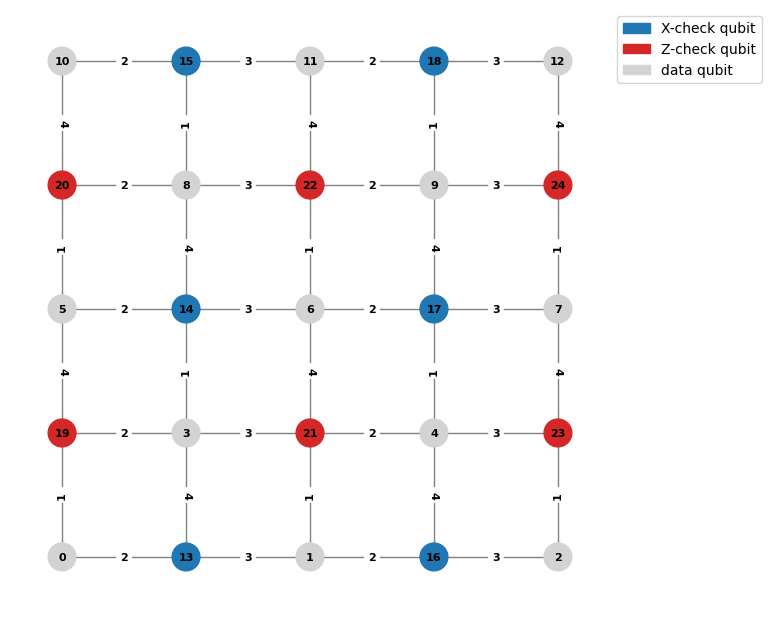

In [3]:
rsc.draw_graph()

In [4]:
rsc.build_memory_circuit(number_of_rounds=2)
rsc.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.01)-----------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)------------M:rec[24]-DETECTOR:D18=rec[24]*rec[27]*rec[29]*rec[18]---------OBSERVABLE_INCLUDE:L0*=rec[24]*rec[25]*rec[26]-
                                                                                                                              | |                                                                                                                     | |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | |                                                                                                                     | |
 q1: -R-DEPOLARIZE1(0.01)-----------------------------------------------------------------------------------------------------|-|-------------------------------------@-DEPOLARIZE2(0.01)-------------------------------------------------------------|-|---------------------------------------------------------X-DEPOLARIZE2(0.01)-------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

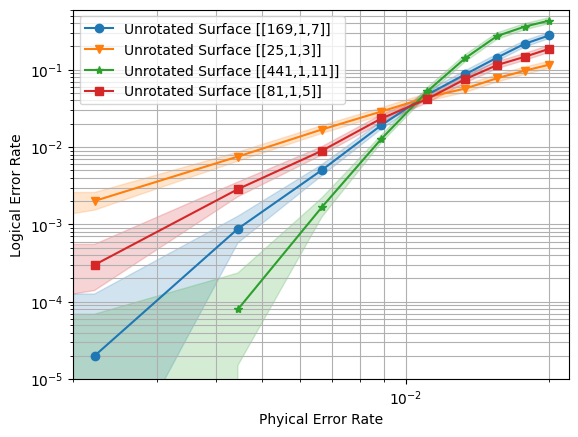

In [5]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = UnrotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10),
    decoder='pymatching'
    
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="Z"
)

th.plot_stats(
    x_min = 2e-3, 
    x_max = 2.2e-2,
    y_min = 1e-5, 
    y_max = 6e-1
)

In [6]:
th = ThresholdLAB(
    configurations = [{"distance": d} for d in [3, 5, 7, 11]],
    code = UnrotatedSurfaceCode,
    error_rates = np.linspace(0, 0.02, 10),
    decoder='pymatching'
    
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="X"
)

th.plot_stats(
    x_min = 2e-3, 
    x_max = 2.2e-2,
    y_min = 1e-5, 
    y_max = 6e-1
)

ValueError: Worker failed: traceback=Traceback (most recent call last):
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 28, in _fill_in_task
    dem = circuit.detector_error_model(decompose_errors=True, approximate_disjoint_errors=True)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D329', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D329 > output_image.svg

This was discovered while analyzing an X-basis reset (RX) on:
    qubit 440

The collapse anti-commuted with these detectors/observables:
    D329

The backward-propagating error sensitivity for D329 was:
    Z440

Circuit stack trace:
    at instruction #1 [which is RX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 31, in _fill_in_task
    dem = circuit.detector_error_model(approximate_disjoint_errors=True)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D329', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D329 > output_image.svg

This was discovered while analyzing an X-basis reset (RX) on:
    qubit 440

The collapse anti-commuted with these detectors/observables:
    D329

The backward-propagating error sensitivity for D329 was:
    Z440

Circuit stack trace:
    at instruction #1 [which is RX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 243, in run_message_loop
    num_messages_processed = self.process_messages()
                             ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 175, in process_messages
    self.compute_strong_id(new_task=message_body)
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 133, in compute_strong_id
    strong_id = _fill_in_task(new_task).strong_id()
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aaa/github/graphqec/.env/lib/python3.12/site-packages/sinter/_collection/_collection_worker_state.py", line 33, in _fill_in_task
    dem = circuit.detector_error_model(approximate_disjoint_errors=True, flatten_loops=True)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D329', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D329 > output_image.svg

This was discovered while analyzing an X-basis reset (RX) on:
    qubit 440

The collapse anti-commuted with these detectors/observables:
    D329

The backward-propagating error sensitivity for D329 was:
    Z440

Circuit stack trace:
    at instruction #1 [which is RX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440]
